In [1]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score,precision_recall_curve,roc_curve,auc,confusion_matrix,recall_score,precision_score
import matplotlib.pyplot as plt
import pickle
from glob import glob
import numpy as np
import cv2
from VIF import ViF


In [2]:
no_accidents = np.genfromtxt("D:\ZU\Last year\Graduation_Project\Final work\crash estimation\VIF\models\data_no_accident.csv", delimiter=",")

# balance data as accident 
no_accidents = no_accidents[0:57, :]

y_no_accidents = np.zeros(no_accidents.shape[0])
y_no_accidents = y_no_accidents.reshape(no_accidents.shape[0], 1)

print(no_accidents.shape)


(57, 304)


In [3]:
accidents = np.genfromtxt("D:\ZU\Last year\Graduation_Project\Final work\crash estimation\VIF\models\data_accident.csv", delimiter=",")
y_accidents = np.ones(accidents.shape[0])
y_accidents = y_accidents.reshape(accidents.shape[0], 1)

X = np.vstack((no_accidents, accidents))
y = np.vstack((y_no_accidents, y_accidents))

print(X.shape, y.shape)
print(no_accidents.shape)
print(accidents.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

(114, 304) (114, 1)
(57, 304)
(57, 304)


In [4]:
clf = SVC(
    kernel="linear", probability=True, tol=1e-3
)  # , verbose = True) #Set the classifier as a support vector machines with

clf.fit(X_train, y_train)
print("Normal score: ", clf.score(X_test, y_test))


Normal score:  0.75


C:\Users\maher\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [5]:
# average presition
y_score = clf.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
print("Average precision-recall score: {0:0.2f}".format(average_precision))


Average precision-recall score: 0.83


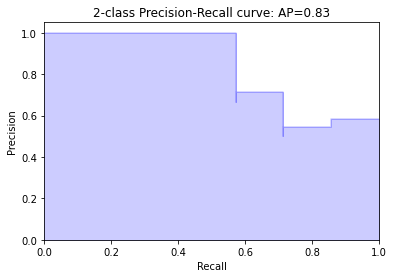

Confusion matrix tn, fp, fn, tp  5 0 3 4
recall 0.5714285714285714
precision 1.0


In [6]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
# print("precision", precision, "recall", recall)

plt.step(recall, precision, color="b", alpha=0.2, where="post")
plt.fill_between(recall, precision, step="post", alpha=0.2, color="b")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("2-class Precision-Recall curve: AP={0:0.2f}".format(average_precision))
plt.show()


# ROC
preds = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("Confusion matrix tn, fp, fn, tp ", tn, fp, fn, tp)

print("recall", recall_score(y_test, preds))
print("precision", precision_score(y_test, preds))


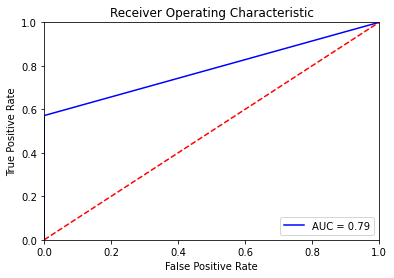

In [7]:
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


# print(X_test)
# print(y_test)
# print(clf.predict(X_test))

# pickle.dump(clf, open('models/model-svm.sav', 'wb'))


In [8]:
cap = cv2.VideoCapture("dataset/no_accident/10.avi")
frames = []
vif = ViF()

while True:
    ret, frame = cap.read()

    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)

    else:
        break



In [9]:
obj = ViF()
feature_vec = obj.process(frames)
print(clf.predict(feature_vec.reshape(1, 304)))


[0.]


In [10]:

"""
X, Y = load_bd()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    X = np.array(X)
    Y = np.array(Y)

    print X.shape
    print Y.shape
    # print Y

    #np.savetxt("X.csv", X, delimiter=",")
    #np.savetxt("Y.csv", Y, delimiter=",")

    clf = SVC(kernel='linear', probability=True, tol=1e-3)  # , verbose = True) #Set the classifier as a support vector machines with

    clf.fit(X_train, y_train)
    #joblib.dump(clf, '../models/ship-svm.pkl')
    pickle.dump(clf, open('../models/ship-svm.sav', 'wb'))

    print "Normal score: ", clf.score(X_test, y_test)
"""


'\nX, Y = load_bd()\n\n    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)\n\n    X = np.array(X)\n    Y = np.array(Y)\n\n    print X.shape\n    print Y.shape\n    # print Y\n\n    #np.savetxt("X.csv", X, delimiter=",")\n    #np.savetxt("Y.csv", Y, delimiter=",")\n\n    clf = SVC(kernel=\'linear\', probability=True, tol=1e-3)  # , verbose = True) #Set the classifier as a support vector machines with\n\n    clf.fit(X_train, y_train)\n    #joblib.dump(clf, \'../models/ship-svm.pkl\')\n    pickle.dump(clf, open(\'../models/ship-svm.sav\', \'wb\'))\n\n    print "Normal score: ", clf.score(X_test, y_test)\n'

In [12]:
clf_full = SVC(
    kernel="linear", probability=True, tol=1e-3
)  # , verbose = True) #Set the classifier as a support vector machines with
clf_full.fit(X, y)
pickle.dump(clf_full, open("models/model-svm.sav", "wb"))

C:\Users\maher\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
